In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import osa
import time
##print(os.listdir("../input"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics
# Plotly library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 500)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
import gc
from catboost import CatBoostClassifier
from tqdm import tqdm_notebook
import plotly.offline as py


In [1]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }
train = pd.read_csv('F:/lab/train.csv',dtype=dtypes)
train.shape

NameError: name 'pd' is not defined

In [71]:
test1 = pd.read_csv('F:/lab/test.csv',dtype=dtypes)
test1.shape

(7853253, 82)

In [5]:
droppable_features = []

In [6]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

PuaMode                                              0.999741
Census_ProcessorClass                                0.995894
DefaultBrowsersIdentifier                            0.951416
Census_IsFlightingInternal                           0.830440
Census_InternalBatteryType                           0.710468
Census_ThresholdOptIn                                0.635245
Census_IsWIMBootEnabled                              0.634390
SmartScreen                                          0.356108
OrganizationIdentifier                               0.308415
SMode                                                0.060277
CityIdentifier                                       0.036475
Wdft_IsGamer                                         0.034014
Wdft_RegionIdentifier                                0.034014
Census_InternalBatteryNumberOfCharges                0.030124
Census_FirmwareManufacturerIdentifier                0.020541
Census_IsFlightsDisabled                             0.017993
Census_F

In [7]:
droppable_features.append('PuaMode')
droppable_features.append('Census_ProcessorClass')
droppable_features.append('DefaultBrowsersIdentifier')

In [8]:
###2.2 Too skewed columns

In [9]:
train.shape


(8921483, 83)

In [8]:
pd.options.display.float_format = '{:,.4f}'.format
sk_df = pd.DataFrame([{'column': c, 'uniq': train[c].nunique(), 'skewness': train[c].value_counts(normalize=True).values[0] * 100} for c in train.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

,column,skewness,uniq
75,Census_IsWIMBootEnabled,100.0000,2
5,IsBeta,99.9992,2
69,Census_IsFlightsDisabled,99.9990,2
68,Census_IsFlightingInternal,99.9986,2
27,AutoSampleOptIn,99.9971,2
71,Census_ThresholdOptIn,99.9749,2
29,SMode,99.9537,2
65,Census_IsPortableOperatingSystem,99.9455,2
28,PuaMode,99.9134,2
35,Census_DeviceFamily,99.8383,3


In [9]:
droppable_features.extend(sk_df[sk_df.skewness > 95].column.tolist())
droppable_features

['PuaMode',
 'Census_ProcessorClass',
 'DefaultBrowsersIdentifier',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice',
 'ProductName',
 'HasTpm',
 'IsSxsPassiveMode',
 'Firewall',
 'AVProductsEnabled',
 'RtpStateBitfield',
 'OsVer',
 'Platform',
 'Census_IsPenCapable']

In [10]:
train.drop(droppable_features, axis=1, inplace=True)

In [72]:
###altering the same for test data
test1.drop(droppable_features, axis=1, inplace=True)

In [74]:
train.shape

(7730792, 51)

In [73]:
test1.shape

(7853253, 48)

In [14]:
null_counts = train.isnull().sum()
null_counts = null_counts / train.shape[0]
null_counts[null_counts > 0.1]

OrganizationIdentifier       0.3084
SmartScreen                  0.3561
Census_InternalBatteryType   0.7105
dtype: float64

In [15]:
train.SmartScreen.value_counts()

RequireAdmin    4316183
ExistsNotSet    1046183
Off              186553
Warn             135483
Prompt            34533
Block             22533
off                1350
On                  731
&#x02;              416
&#x01;              335
on                  147
requireadmin         10
OFF                   4
0                     3
Promt                 2
requireAdmin          1
Enabled               1
prompt                1
warn                  1
00000000              1
&#x03;                1
Name: SmartScreen, dtype: int64

In [16]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist'
}
train.replace({'SmartScreen': trans_dict}, inplace=True)

In [17]:
test1.replace({'SmartScreen': trans_dict}, inplace=True)

In [18]:
train.SmartScreen.isnull().sum()

0

In [19]:
test1.SmartScreen.isnull().sum()

0

In [20]:
train.OrganizationIdentifier.value_counts()

27.0000    4196457
18.0000    1764175
48.0000      63845
50.0000      45502
11.0000      19436
37.0000      19398
49.0000      13627
46.0000      10974
14.0000       4713
32.0000       4045
36.0000       3909
52.0000       3043
33.0000       2896
2.0000        2595
5.0000        1990
40.0000       1648
28.0000       1591
4.0000        1385
10.0000       1083
51.0000        917
20.0000        915
1.0000         893
8.0000         723
22.0000        418
39.0000        413
6.0000         412
31.0000        398
21.0000        397
47.0000        385
3.0000         331
16.0000        242
19.0000        172
26.0000        160
44.0000        150
29.0000        135
42.0000        132
7.0000          98
41.0000         77
45.0000         73
30.0000         64
43.0000         60
35.0000         32
23.0000         20
15.0000         13
25.0000         12
12.0000          7
34.0000          2
38.0000          1
17.0000          1
Name: OrganizationIdentifier, dtype: int64

In [21]:
train.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [75]:
test1.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [23]:
pd.options.display.max_rows = 99
train.Census_InternalBatteryType.value_counts()

lion        2028256
li-i         245617
#            183998
lip           62099
liio          32635
li p           8383
li             6708
nimh           4614
real           2744
bq20           2302
pbac           2274
vbox           1454
unkn            533
lgi0            399
lipo            198
lhp0            182
4cel            170
lipp             83
ithi             79
batt             60
ram              35
bad              33
virt             33
pad0             22
lit              16
ca48             16
a132             10
ots0              9
lai0              8
ÿÿÿÿ              8
lio               5
4lio              4
lio              4
asmb              4
li-p              4
0x0b              3
lgs0              3
icp3              3
3ion              2
a140              2
h00j              2
5nm1              2
lhpo              2
a138              2
lilo              1
li-h              1
lp                1
li?               1
ion              1
pbso              1


In [24]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
train.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

In [25]:
test1.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

train.shape

In [26]:
train.dropna(inplace=True)
train.shape

(7730792, 60)

In [27]:
test1.shape

(7853253, 59)

In [28]:
test1 = test1.fillna(test1.mode())
test1.shape

(7853253, 59)

In [29]:
train.drop('MachineIdentifier', axis=1, inplace=True)

In [30]:
test1.drop('MachineIdentifier', axis=1, inplace=True)

In [ ]:
---------------------------paused here in kaggle-------------------------

In [31]:
train['SmartScreen'] = train.SmartScreen.astype('category')
train['Census_InternalBatteryType'] = train.Census_InternalBatteryType.astype('category')

cate_cols = train.select_dtypes(include='category').columns.tolist()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cate_cols:
    train[col] = le.fit_transform(train[col])

In [32]:
test1['SmartScreen'] = test1.SmartScreen.astype('category')
test1['Census_InternalBatteryType'] = test1.Census_InternalBatteryType.astype('category')

cate_cols = test1.select_dtypes(include='category').columns.tolist()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cate_cols:
    test1[col] = le.fit_transform(test1[col])

In [33]:
train.shape

(7730792, 59)

In [34]:
test1.shape

(7853253, 58)

In [35]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

%time
train = reduce_mem_usage(train)

Wall time: 998 µs
Memory usage of dataframe is 2042.23 MB
Memory usage after optimization is: 869.97 MB
Decreased by 57.4%


In [36]:


test1=reduce_mem_usage(test1)

Memory usage of dataframe is 2007.17 MB
Memory usage after optimization is: 831.36 MB
Decreased by 58.6%


In [37]:
cols = train.columns.tolist()

In [38]:
cols

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Processor',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatt

In [100]:
------------------------------------------------------------cols=test1.columns.tolist()

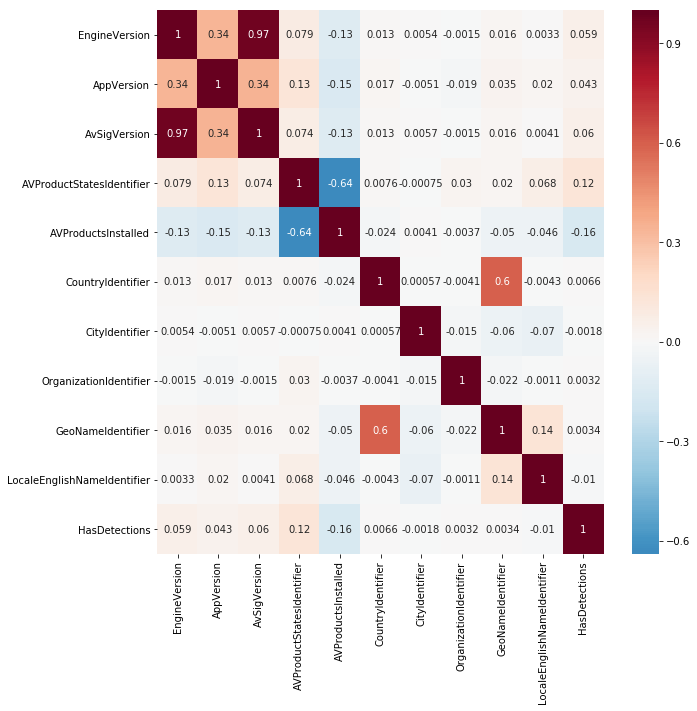

In [39]:
import seaborn as sns

plt.figure(figsize=(10,10))
co_cols = cols[:10]
co_cols.append('HasDetections')
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()


In [40]:
print(train.EngineVersion.nunique())
print(train.AvSigVersion.nunique())

67
8488


In [41]:
corr_remove = ['EngineVersion']

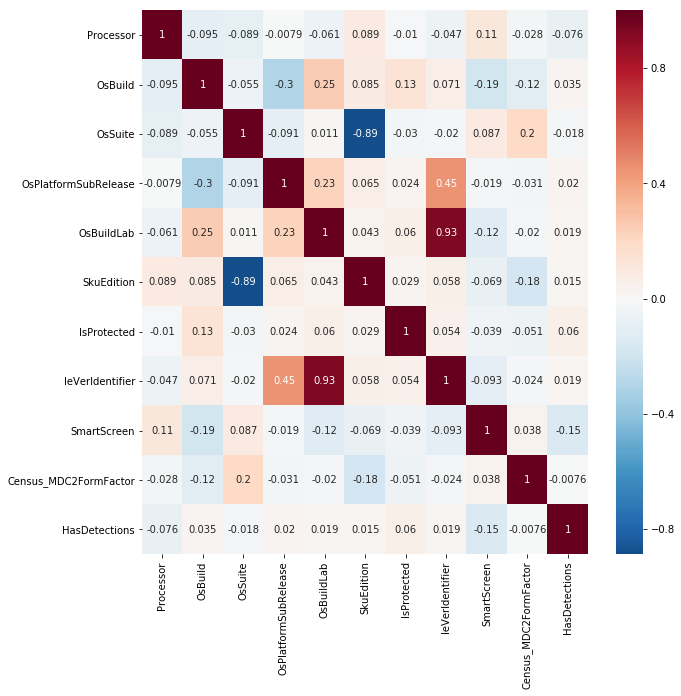

In [42]:
co_cols = cols[10:20]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [43]:
print(train.OsSuite.nunique())
print(train.SkuEdition.nunique())
print(train.OsBuildLab.nunique())
print(train.IeVerIdentifier.nunique())

4
7
617
265


In [44]:
corr_remove.append('OsSuite')
corr_remove.append('IeVerIdentifier')

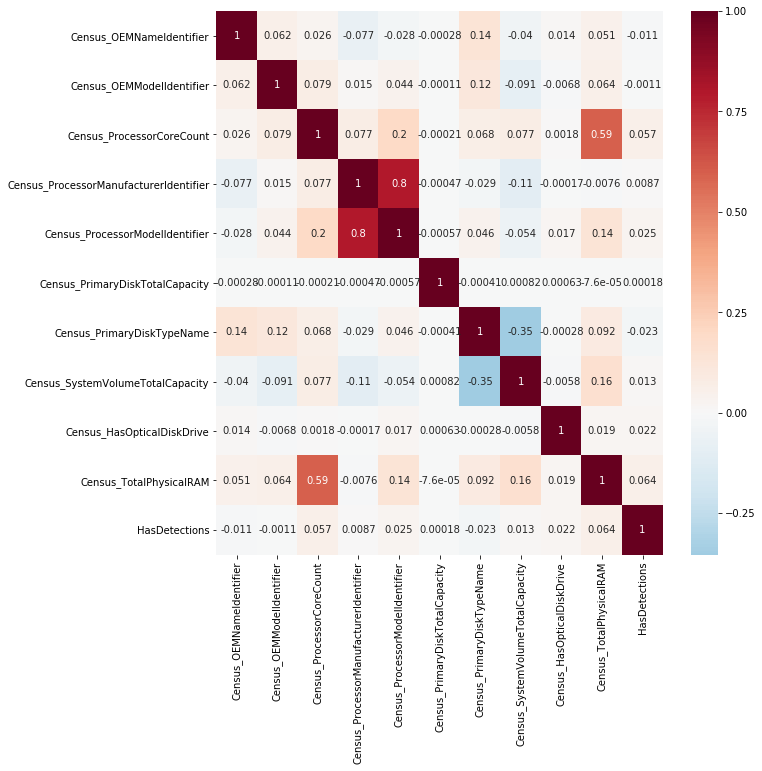

In [45]:
co_cols = cols[20:30]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [46]:
print(train.Census_ProcessorManufacturerIdentifier.nunique())
print(train.Census_ProcessorModelIdentifier.nunique())

6
2345


In [47]:
corr_remove.append('Census_ProcessorManufacturerIdentifier')

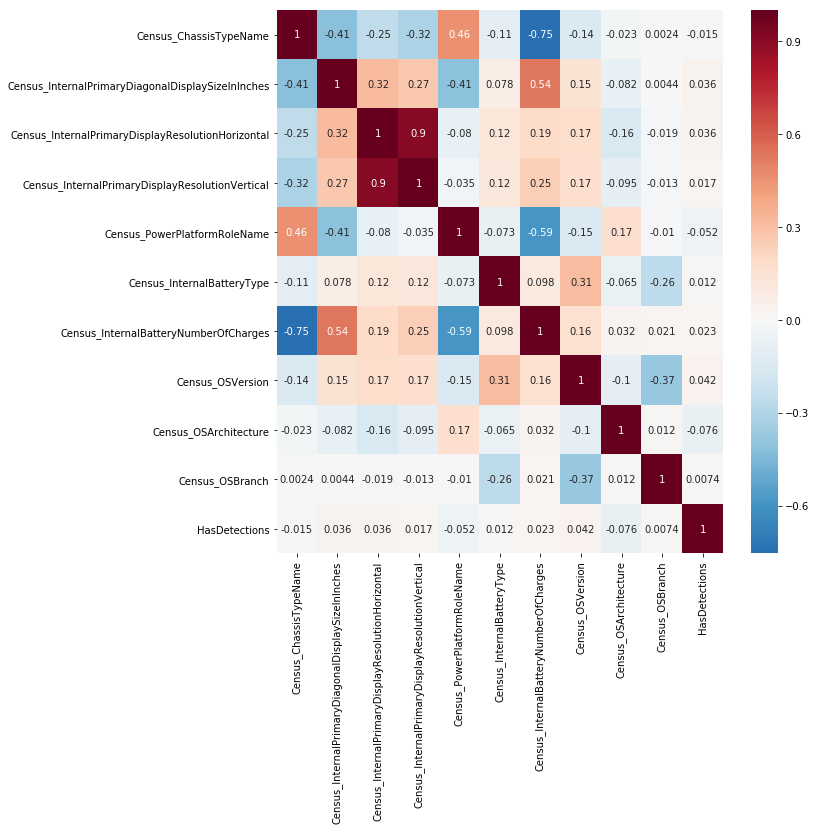

In [48]:
co_cols = cols[30:40]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [49]:
print(train.Census_InternalPrimaryDisplayResolutionHorizontal.nunique())
print(train.Census_InternalPrimaryDisplayResolutionVertical.nunique())

1582
1234


In [50]:
corr_remove.append('Census_InternalPrimaryDisplayResolutionVertical')

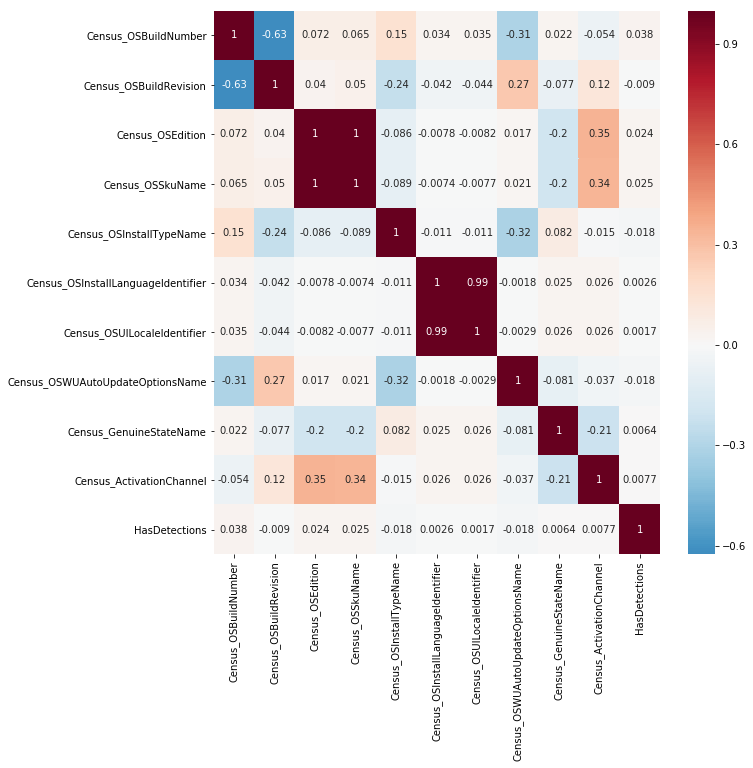

In [51]:
co_cols = cols[40:50]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()


In [52]:
print(train.Census_OSEdition.nunique())
print(train.Census_OSSkuName.nunique())

print(train.Census_OSInstallLanguageIdentifier.nunique())
print(train.Census_OSUILocaleIdentifier.nunique())

29
25
39
144


In [53]:
corr_remove.append('Census_OSSkuName')
corr_remove.append('Census_OSInstallLanguageIdentifier')

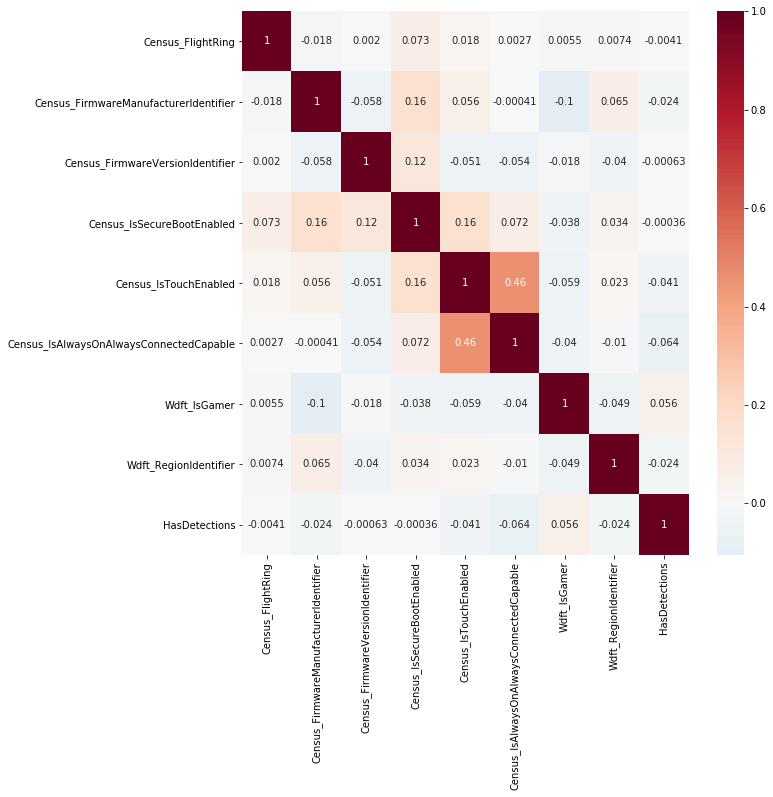

In [54]:
co_cols = cols[50:]
#co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0)
plt.show()

In [55]:
train.drop(corr_remove, axis=1, inplace=True)

In [56]:
train.shape

(7730792, 52)

In [57]:
test1.drop(corr_remove, axis=1, inplace=True)

In [58]:
test1.shape

(7853253, 51)

In [59]:
corr_remove

['EngineVersion',
 'OsSuite',
 'IeVerIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSSkuName',
 'Census_OSInstallLanguageIdentifier']

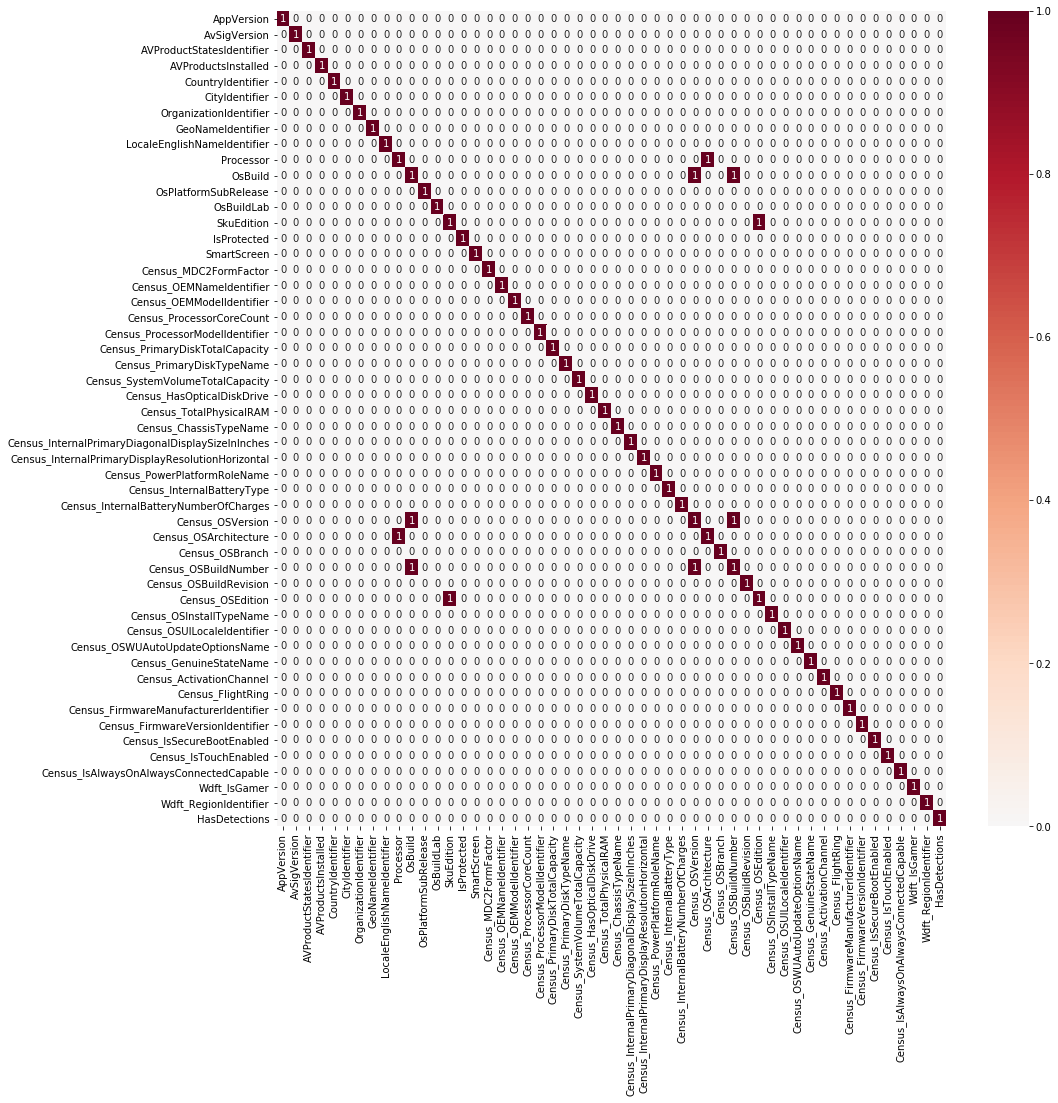

In [60]:
corr = train.corr()
high_corr = (corr >= 0.8).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [61]:
print(train.OsBuild.nunique())
print(train.Census_OSBuildNumber.nunique())
print(train.Census_OSVersion.nunique(), '\n')

print(train.Census_OSArchitecture.nunique())
print(train.Processor.nunique(), '\n')

print(train.Census_OSEdition.nunique())
print(train.SkuEdition.nunique())

71
152
428 

3
3 

29
7


In [62]:
corr_remove.extend(['OsBuild', 'Census_OSBuildNumber', 'Processor', 'SkuEdition'])
corr_remove

['EngineVersion',
 'OsSuite',
 'IeVerIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSSkuName',
 'Census_OSInstallLanguageIdentifier',
 'OsBuild',
 'Census_OSBuildNumber',
 'Processor',
 'SkuEdition']

In [63]:
droppable_features.extend(corr_remove)
print(len(droppable_features))
droppable_features

35


['PuaMode',
 'Census_ProcessorClass',
 'DefaultBrowsersIdentifier',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice',
 'ProductName',
 'HasTpm',
 'IsSxsPassiveMode',
 'Firewall',
 'AVProductsEnabled',
 'RtpStateBitfield',
 'OsVer',
 'Platform',
 'Census_IsPenCapable',
 'EngineVersion',
 'OsSuite',
 'IeVerIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSSkuName',
 'Census_OSInstallLanguageIdentifier',
 'OsBuild',
 'Census_OSBuildNumber',
 'Processor',
 'SkuEdition']

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7730792 entries, 0 to 8921482
Data columns (total 52 columns):
AppVersion                                           int8
AvSigVersion                                         int16
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
CountryIdentifier                                    int16
CityIdentifier                                       float32
OrganizationIdentifier                               float16
GeoNameIdentifier                                    float16
LocaleEnglishNameIdentifier                          int16
Processor                                            int8
OsBuild                                              int16
OsPlatformSubRelease                                 int8
OsBuildLab                                           int16
SkuEdition                                           int8
IsProtected                                          fl

In [65]:
from xgboost import XGBClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [66]:
y = train.pop('HasDetections')
X = train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [67]:
model = XGBClassifier()
model.fit(X_train, y_train)

[10:46:36] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
----------------------------paused here-----------------------------

In [80]:
results.shape

(6849862, 2)

In [70]:
test1.shape

(7853253, 51)

In [69]:
results = model.predict_proba(test1)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields OsBuildLab, Census_PrimaryDiskTypeName, Census_ChassisTypeName, Census_PowerPlatformRoleName, Census_OSEdition, Census_GenuineStateName

In [78]:
results

array([[0.4669025 , 0.5330975 ],
       [0.39018625, 0.60981375],
       [0.50481033, 0.49518967],
       ...,
       [0.48253667, 0.5174633 ],
       [0.59428483, 0.40571517],
       [0.45602256, 0.54397744]], dtype=float32)

In [83]:
y=pd.DataFrame(results)

In [87]:
y.to_csv('submissionxgboost.csv', index=False)

In [98]:
l=test1.iloc[:,0]

In [99]:
l.to_csv('submission machine.csv', index=False)

In [85]:
y_pred1
pred = clf.predict_proba(X_test)

array([1, 1, 0, ..., 1, 0, 1], dtype=int8)

In [115]:
len(results)

6849862

In [102]:
index=pd.read_csv('F:/lab/sample_submission.csv')

In [104]:
index.drop('HasDetections', axis=1, inplace=True)

In [110]:
y.drop(0,axis=1,inplace=True)

In [112]:
z=pd.concat([index,y], axis=1)

In [114]:
z.to_csv('finalsubmission.csv', index=False)

In [86]:

# make predictions for test data

predictions1 = [round(value) for value in y_pred1]



In [88]:
test1['HasDetections'] = predictions1
test1.to_csv('submission.csv', index=False)

In [79]:


accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.87%


In [61]:
###decision tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [63]:
y_pred1 = clf.predict(X_test)
predictions1 = [round(value) for value in y_pred1]
accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))


Accuracy: 57.83%


In [84]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [85]:
auc(y_test,predictions1)

AttributeError: 'list' object has no attribute 'dtype'

# neuralnet

In [82]:
from keras import callbacks
from sklearn.metrics import roc_auc_score

class printAUC(callbacks.Callback):
    def __init__(self, X_train, y_train):
        super(printAUC, self).__init__()
        self.bestAUC = 0
        self.X_train = X_train
        self.y_train = y_train
        
    def on_epoch_end(self, epoch, logs={}):
        pred = self.model.predict(np.array(self.X_train))
        auc = roc_auc_score(self.y_train, pred)
        print("Train AUC: " + str(auc))
        #pred = self.model.predict(self.validation_data[0])
        #auc = roc_auc_score(self.validation_data[1], pred)
        #print ("Validation AUC: " + str(auc))
        if (self.bestAUC < auc) :
            self.bestAUC = auc
            self.model.save("bestNet.h5", overwrite=True)
        return

Using TensorFlow backend.


In [83]:
from keras.layers import Dense,Dropout,BatchNormalization
from keras import regularizers
import keras
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
from keras import backend as K
from sklearn.model_selection import train_test_split

In [84]:
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)

In [85]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))

In [86]:
from keras import models
from keras.callbacks import LearningRateScheduler
#kernel_regularizer=regularizers.l2(0.01)
model = models.Sequential()
model.add(Dense(128, activation='relu',input_shape=(train.shape[1],)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32 ,activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

annealer = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** x)

In [73]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [74]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy',auc])

AttributeError: 'XGBClassifier' object has no attribute 'compile'

In [91]:
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, annealer]
for i in range(5):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    
    print("{} iteration".format(i+1))
    history= model.fit(X_train,y_train,batch_size=512,epochs=3,verbose=1,callbacks=callbacks_list,validation_data=(X_test,y_test))
    del X_train, X_test, y_train, Y_test
    gc.collect()

1 iteration
Train on 6184633 samples, validate on 1546159 samples
Epoch 1/3
6184633/6184633 [==============================] - 94s 15us/step - loss: 0.6870 - acc: 0.5425 - auc: 0.5468 - val_loss: 0.6858 - val_acc: 0.5403 - val_auc: 0.5547


NameError: name 'math' is not defined

In [21]:
#Add All the Models Libraries

# Scalers
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# Models



# Cross-validation
from sklearn.model_selection import KFold, StratifiedKFold, KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate

# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Common data processors
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from scipy import sparse

In [23]:
import numpy as np
import pandas as pd
import os
import warnings
import gc
import os
from six.moves import urllib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew

In [24]:
# to make this notebook's output stable across runs
np.random.seed(123)
gc.collect()
# To plot pretty figures
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [29]:
#Reduce the memory usage - Inspired by Panchajanya Banerjee
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df



In [ ]:
Highly correlated features

In [30]:
cols = train.columns.tolist()

AttributeError: 'NoneType' object has no attribute 'columns'

In [31]:
import seaborn as sns

plt.figure(figsize=(10,10))
co_cols = cols[:10]
co_cols.append('HasDetections')
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

NameError: name 'cols' is not defined

<Figure size 720x720 with 0 Axes>

In [22]:
print(train.EngineVersion.nunique())
print(train.AvSigVersion.nunique())

70
8531


In [23]:
corr_remove = ['EngineVersion']

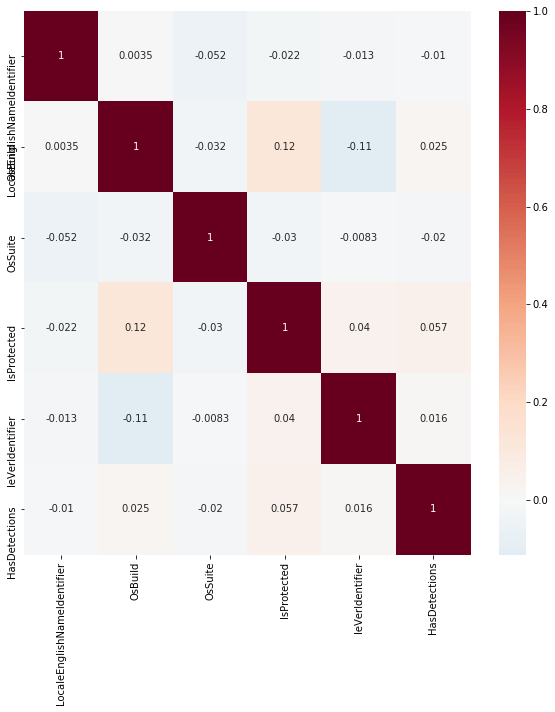

In [24]:
co_cols = cols[10:20]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [25]:
print(train.OsSuite.nunique())
print(train.SkuEdition.nunique())
print(train.OsBuildLab.nunique())
print(train.IeVerIdentifier.nunique())

14
8
663
303


In [26]:
corr_remove.append('OsSuite')
corr_remove.append('IeVerIdentifier')

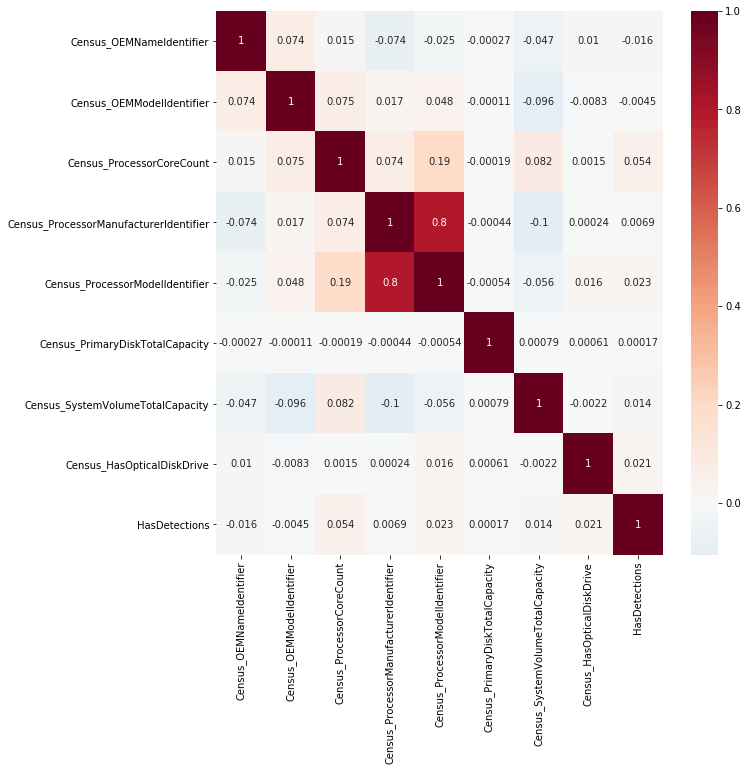

In [27]:
co_cols = cols[20:30]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [28]:
print(train.Census_ProcessorManufacturerIdentifier.nunique())
print(train.Census_ProcessorModelIdentifier.nunique())

7
2583


In [29]:
corr_remove.append('Census_ProcessorManufacturerIdentifier')

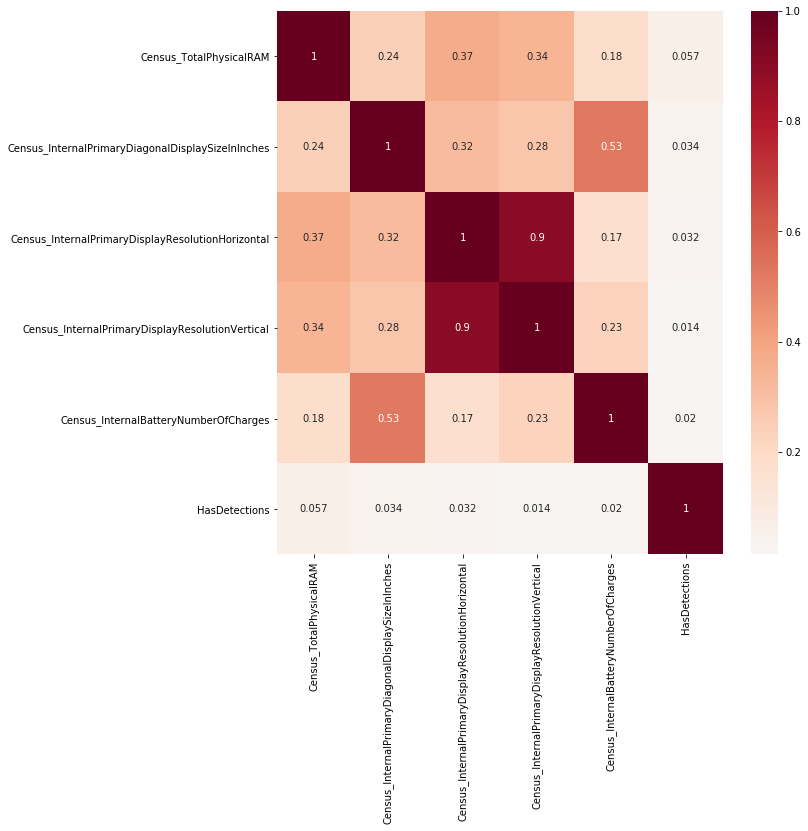

In [30]:
co_cols = cols[30:40]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [31]:
print(train.Census_InternalPrimaryDisplayResolutionHorizontal.nunique())
print(train.Census_InternalPrimaryDisplayResolutionVertical.nunique())

2050
1552


In [32]:
corr_remove.append('Census_InternalPrimaryDisplayResolutionVertical')

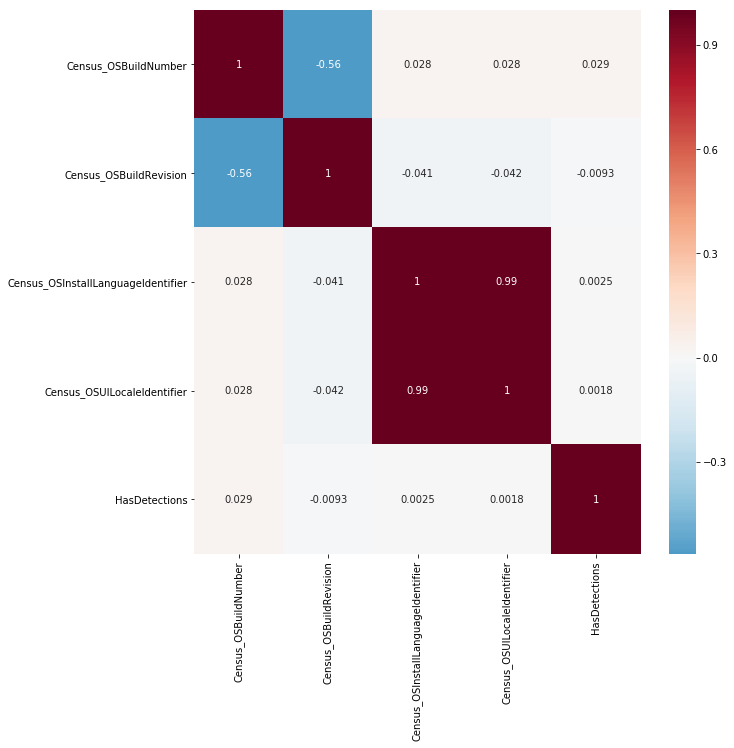

In [33]:
co_cols = cols[40:50]
co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [34]:
print(train.Census_OSEdition.nunique())
print(train.Census_OSSkuName.nunique())

print(train.Census_OSInstallLanguageIdentifier.nunique())
print(train.Census_OSUILocaleIdentifier.nunique())

33
30
39
147


In [35]:
corr_remove.append('Census_OSSkuName')
corr_remove.append('Census_OSInstallLanguageIdentifier')

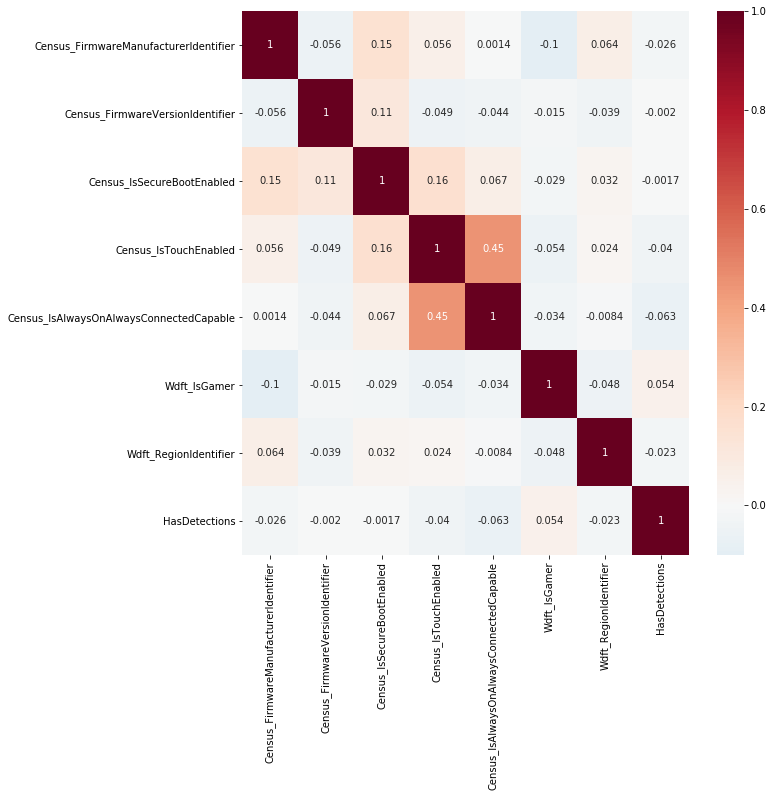

In [36]:
co_cols = cols[50:]
#co_cols.append('HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0)
plt.show()

In [37]:
train.drop(corr_remove, axis=1, inplace=True)

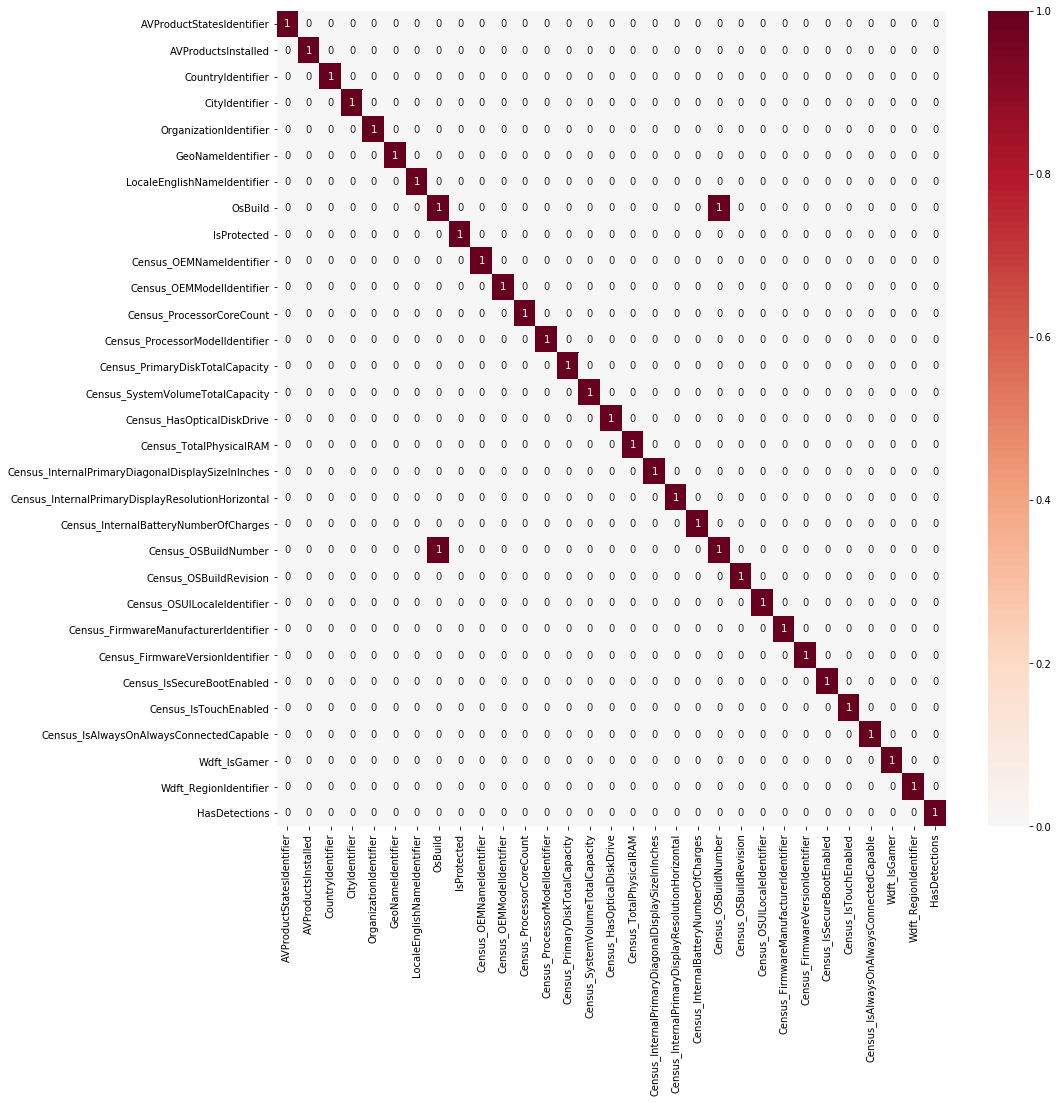

In [38]:
corr = train.corr()
high_corr = (corr >= 0.8).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [39]:
print(train.OsBuild.nunique())
print(train.Census_OSBuildNumber.nunique())
print(train.Census_OSVersion.nunique(), '\n')

print(train.Census_OSArchitecture.nunique())
print(train.Processor.nunique(), '\n')

print(train.Census_OSEdition.nunique())
print(train.SkuEdition.nunique())

76
165
469 

3
3 

33
8


In [40]:
corr_remove.extend(['OsBuild', 'Census_OSBuildNumber', 'Processor', 'SkuEdition'])
corr_remove

['EngineVersion',
 'OsSuite',
 'IeVerIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSSkuName',
 'Census_OSInstallLanguageIdentifier',
 'OsBuild',
 'Census_OSBuildNumber',
 'Processor',
 'SkuEdition']

In [41]:
droppable_features.extend(corr_remove)
print(len(droppable_features))
droppable_features

35


['PuaMode',
 'Census_ProcessorClass',
 'DefaultBrowsersIdentifier',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice',
 'ProductName',
 'HasTpm',
 'IsSxsPassiveMode',
 'Firewall',
 'AVProductsEnabled',
 'RtpStateBitfield',
 'OsVer',
 'Platform',
 'Census_IsPenCapable',
 'EngineVersion',
 'OsSuite',
 'IeVerIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSSkuName',
 'Census_OSInstallLanguageIdentifier',
 'OsBuild',
 'Census_OSBuildNumber',
 'Processor',
 'SkuEdition']

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 53 columns):
MachineIdentifier                                    category
AppVersion                                           category
AvSigVersion                                         category
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
CountryIdentifier                                    int16
CityIdentifier                                       float32
OrganizationIdentifier                               float16
GeoNameIdentifier                                    float16
LocaleEnglishNameIdentifier                          int8
Processor                                            category
OsBuild                                              int16
OsPlatformSubRelease                                 category
OsBuildLab                                           category
SkuEdition                        

In [43]:
from xgboost import XGBClassifier


ModuleNotFoundError: No module named 'xgboost'

In [44]:
from xgboost import XGBClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
from xgboost import XGBClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y = train.pop('HasDetections')
X = train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = XGBClassifier()
model.fit(X_train, y_train)


In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [58]:
model = XGBClassifier()
model.fit(X_train, y_train)


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields MachineIdentifier, AppVersion, AvSigVersion, Processor, OsPlatformSubRelease, OsBuildLab, SkuEdition, SmartScreen, Census_MDC2FormFactor, Census_PrimaryDiskTypeName, Census_ChassisTypeName, Census_PowerPlatformRoleName, Census_InternalBatteryType, Census_OSVersion, Census_OSArchitecture, Census_OSBranch, Census_OSEdition, Census_OSInstallTypeName, Census_OSWUAutoUpdateOptionsName, Census_GenuineStateName, Census_ActivationChannel, Census_FlightRing